# 1. Cargar los datos

In [4]:
# Importamos librerías a utilizar
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [5]:
# URL "raw" del archivo CSV en GitHub
csv_url = "https://raw.githubusercontent.com/josemal98/Proyecto_ML_BEDU/main/Data/heart.csv"

# Cargar el archivo CSV en un DataFrame
df = pd.read_csv(csv_url)

# Ahora puedes trabajar con el DataFrame
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# 2. Análisis exploratorio de los datos

In [ ]:
# Código para obtener un super resumen automático de los datos

# ! pip install -U ydata-profiling
# from ydata_profiling import ProfileReport
# profile = ProfileReport(df, title="Pandas Profiling Report")
# profile.to_notebook_iframe()

In [7]:
# Dimensión de nuestros datos
print(f"Dimensión de los datos: {df.shape}\n")

Dimensión de los datos: (918, 12)



In [8]:
# Tipo de dato de cada variable
print(f"Tipo de dato de cada variable:\n {df.dtypes}\n")

Tipo de dato de cada variable:
 Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object



In [9]:
# Valores faltantes
print(f"Valores faltantes:\n {df.isna().sum()}")

Valores faltantes:
 Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


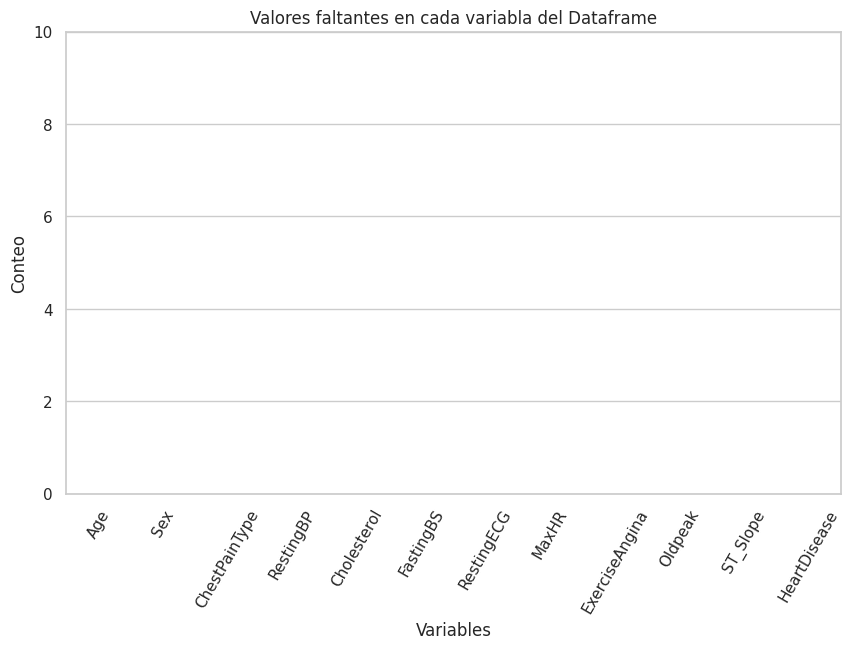

In [10]:

# Configura el estilo de Seaborn
sns.set(style="whitegrid")

# Calcula la cantidad de valores faltantes en cada variable
missing_values = df.isna().sum()

# Crea la gráfica de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.index, y=missing_values.values)
plt.xlabel('Variables')
plt.ylabel('Conteo')
plt.xticks(rotation=60)  # Rotar las etiquetas del eje x para que sean legibles
plt.title('Valores faltantes en cada variabla del Dataframe')

# Establece los límites del eje y de 0 a 10
plt.ylim(0, 10)

plt.show()


#### Primero analizamos nuestras variables categóricas.

Evaluamos que tan balanceadas están las distintas categorías en cada una de nuestras variables.

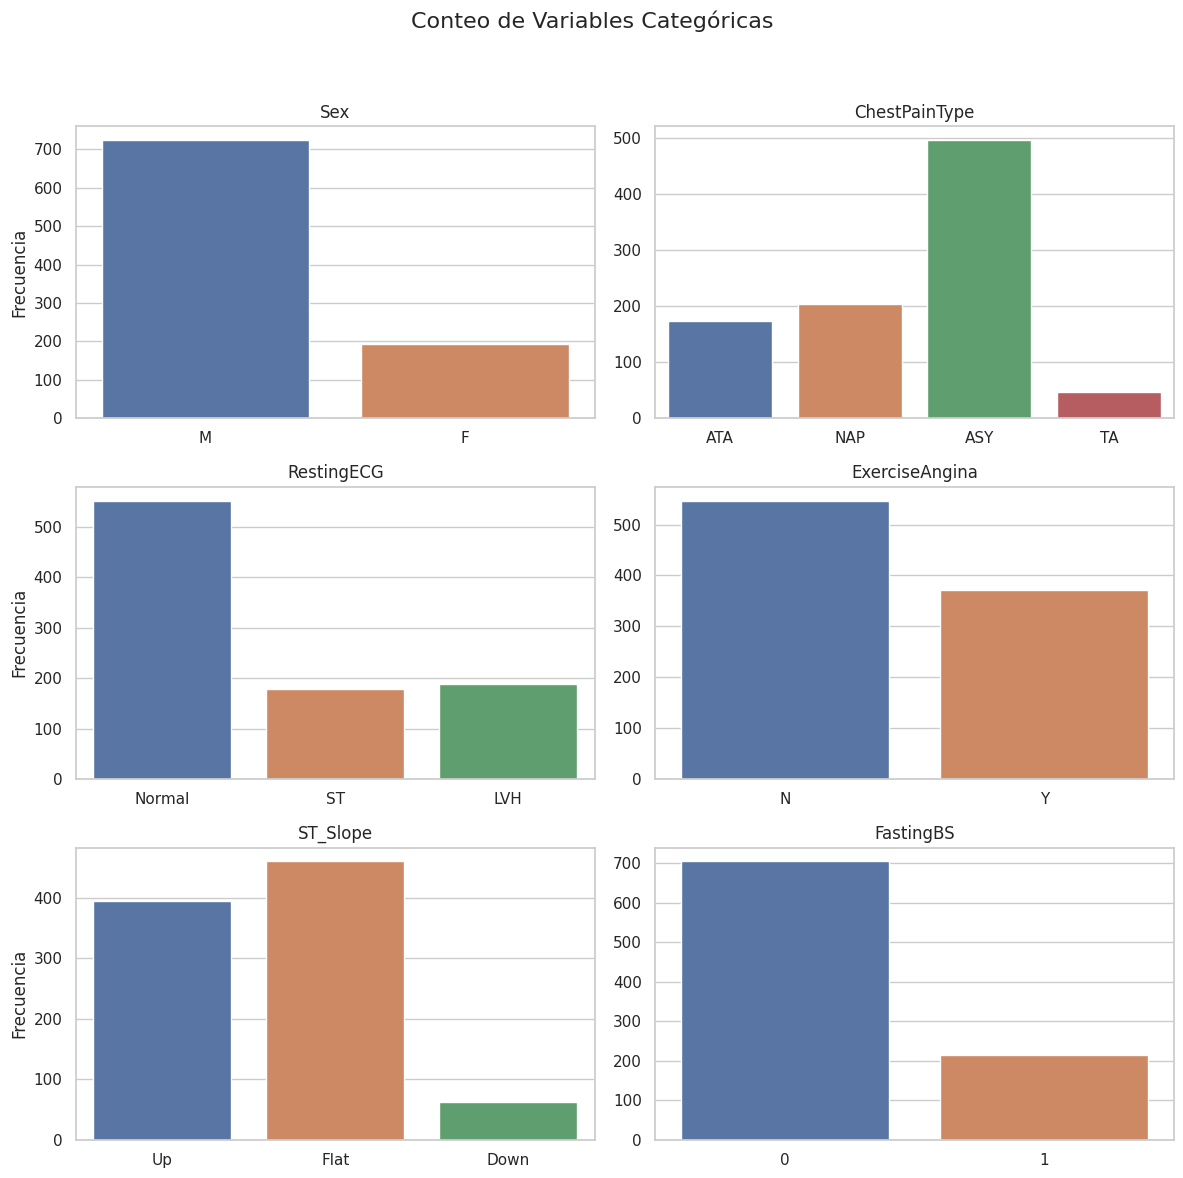

In [26]:
# Configura el estilo de Seaborn
sns.set(style="whitegrid")

# Lista de columnas categóricas, incluyendo 'FastingBS'
categorical_columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'FastingBS']

# Calcula el número de filas y columnas para los subplots
num_rows = 3
num_cols = 2

# Crea la figura y los subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))
fig.subplots_adjust(wspace=0.5, hspace=0.5)  # Ajusta el espacio entre subplots

# Asegúrate de que 'axes' sea una matriz 2D
axes = axes.reshape(-1)

# Itera a través de las columnas categóricas y crea las gráficas de barras
for i, column in enumerate(categorical_columns):
    sns.countplot(data=df, x=column, ax=axes[i])
    axes[i].set_xlabel('')
    if i % 2 == 0:  # Elimina el ylabel de las subgráficas de la derecha
        axes[i].set_ylabel('Frecuencia')
    else:
        axes[i].set_ylabel('')
    axes[i].set_title(column)

# Elimina los subplots vacíos si hay menos de 6 variables categóricas
if len(categorical_columns) < num_rows * num_cols:
    for i in range(len(categorical_columns), num_rows * num_cols):
        fig.delaxes(axes[i])

# Agrega un título general a la figura
plt.suptitle('Conteo de Variables Categóricas', fontsize=16)

# Ajusta el espaciado entre subplots
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Mostrar la figura
plt.show()

#### A continuación analizamos nuestras variables numericas.

Podemos obtener los distintos estadísticos básicos de estás variables, junto con sus respectivas distribuciones.

In [13]:
# Lista de columnas numéricas
numerical_columns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

# Estadísticos de las variables numericas
df[numerical_columns].describe().round(2)

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
count,918.00,918.00,918.00,918.00,918.00
mean,53.51,132.40,198.80,136.81,0.89
std,9.43,18.51,109.38,25.46,1.07
min,28.00,0.00,0.00,60.00,-2.60
25%,47.00,120.00,173.25,120.00,0.00
50%,54.00,130.00,223.00,138.00,0.60
75%,60.00,140.00,267.00,156.00,1.50
max,77.00,200.00,603.00,202.00,6.20


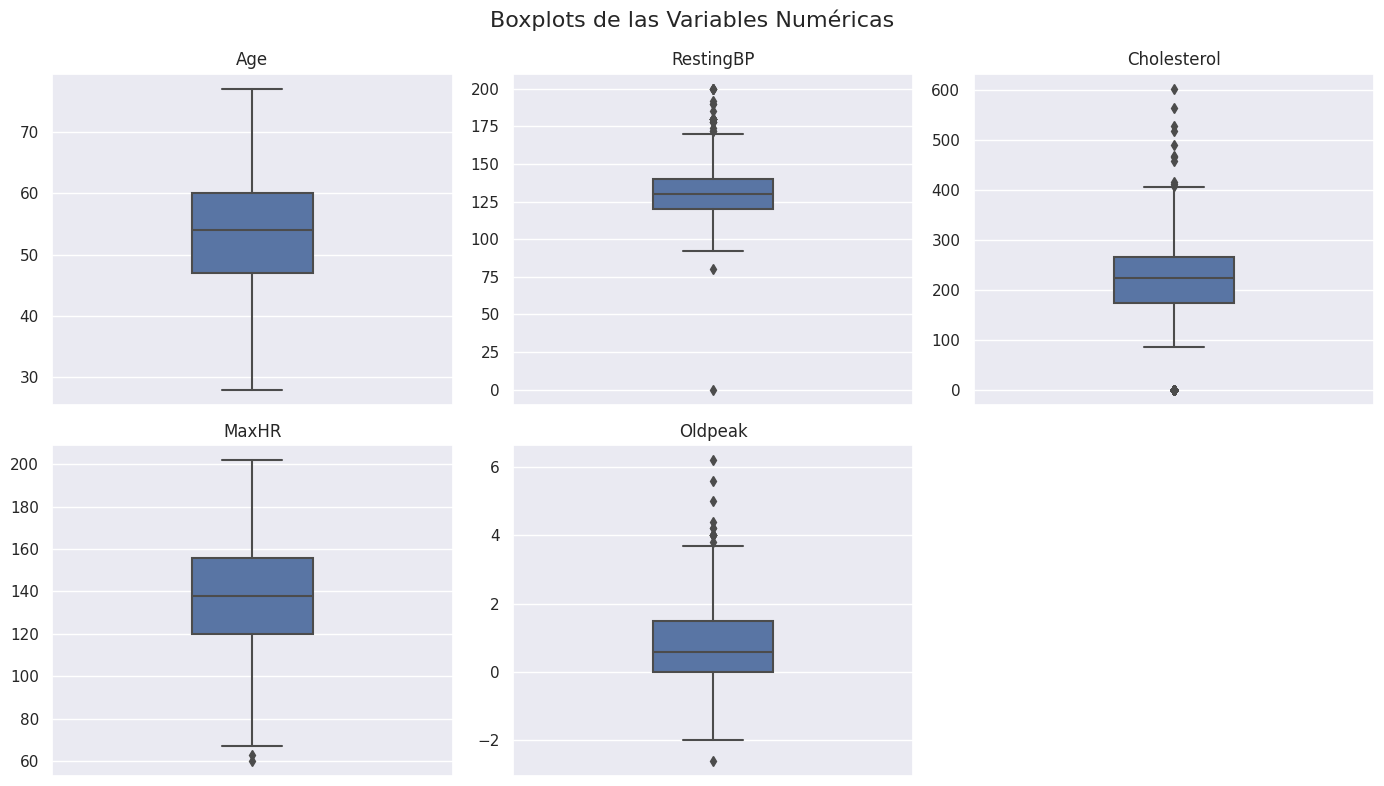

In [14]:

# Configura el estilo de Seaborn en "darkgrid"
sns.set(style="darkgrid")

# Crea una figura con múltiples subplots para los boxplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14, 8))
fig.subplots_adjust(wspace=0.5)  # Ajusta el espacio entre subplots

# Asegúrate de que 'axes' sea una matriz 2D
axes = axes.reshape(-1)

# Itera a través de las columnas numéricas y crea los boxplots
for i, column in enumerate(numerical_columns):
        sns.boxplot(data=df, y=column, ax=axes[i], orient='v', width=0.3)  # Ancho de caja más estrecho (ajusta el valor)
        axes[i].set_title(f'{column}')
        axes[i].set_xlabel('')
        axes[i].set_ylabel('')

# Elimina la subgráfica vacía correspondiente a la variable FastingBS
fig.delaxes(axes[-1])

# Agrega un título general a la figura
fig.suptitle('Boxplots de las Variables Numéricas', fontsize=16)

# Ajusta el espaciado entre subplots
plt.tight_layout()

# Mostrar la figura
plt.show()


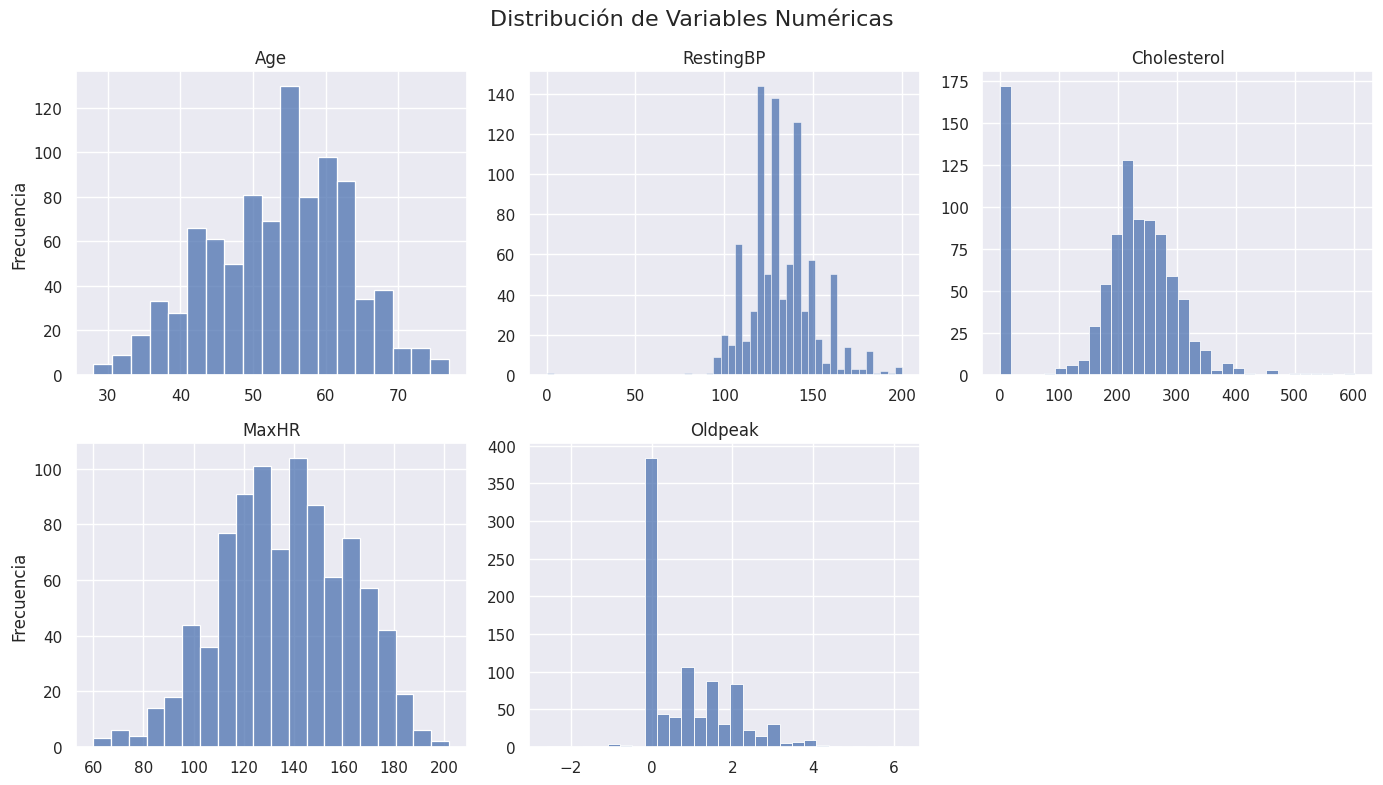

In [15]:

# Configura el estilo de Seaborn en "darkgrid"
sns.set(style="darkgrid")

# Crea una figura con múltiples subplots para los histogramas
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14, 8))
fig.subplots_adjust(wspace=0.5)  # Ajusta el espacio entre subplots

# Asegúrate de que 'axes' sea una matriz 2D
axes = axes.reshape(-1)

# Itera a través de las columnas numéricas y crea los histogramas
for i, column in enumerate(numerical_columns):
    sns.histplot(data=df, x=column, ax=axes[i], kde=False)  # Crear histograma sin KDE
    axes[i].set_title(column)
    axes[i].set_xlabel('')

    # Cambia el ylabel solo en las dos gráficas del extremo izquierdo a "Frecuencia"
    if i in [0, 3]:
        axes[i].set_ylabel('Frecuencia')
    else:
        axes[i].set_ylabel('')  # Elimina el ylabel de las demás gráficas

# Elimina la subgráfica vacía correspondiente a la variable FastingBS
fig.delaxes(axes[-1])

# Agrega un título general a la figura
fig.suptitle('Distribución de Variables Numéricas', fontsize=16)

# Ajusta el espaciado entre subplots
plt.tight_layout()

# Mostrar la figura
plt.show()


#### Procedemos a analizar la correlación que existe entre todas las variables de nuestro Dataframe.

<ipython-input-24-19376b3fdcaa>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


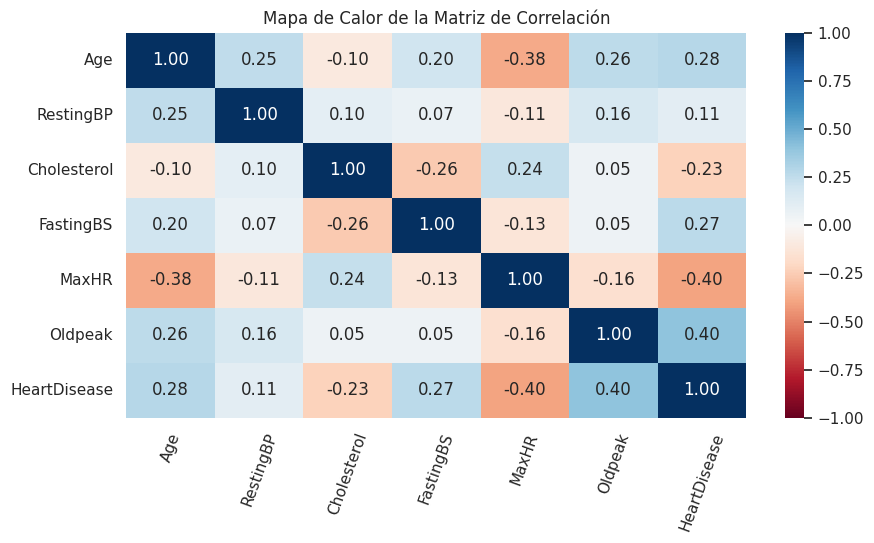

In [24]:
# Calcula la matriz de correlación
correlation_matrix = df.corr()

# Configura el estilo del mapa de calor
sns.set(style="white")

# Crea un mapa de calor de la matriz de correlación
plt.figure(figsize = (10,5))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap="RdBu", fmt=".2f", vmin=-1, vmax=1)
plt.title('Mapa de Calor de la Matriz de Correlación')
# Rotar los labels del eje x a 90 grados
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=70)
plt.show()

#### Finalmente, que tan balanceada está nuestra variable objetivo HearRate.

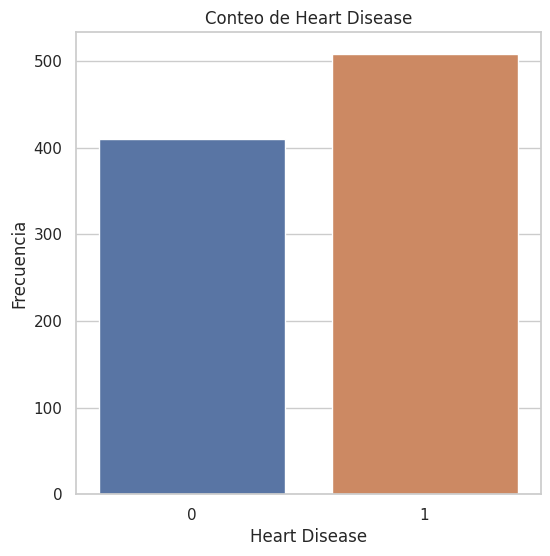

In [28]:
# Configura el estilo de Seaborn
sns.set(style="whitegrid")

# Crea la figura para la gráfica de barras de 'HeartDisease'
plt.figure(figsize=(6, 6))

# Grafica la gráfica de barras de 'HeartDisease'
sns.countplot(data=df, x="HeartDisease")
plt.xlabel('Heart Disease')
plt.ylabel('Frecuencia')
plt.xticks([0, 1], ['0', '1'])
plt.title('Conteo de Heart Disease')

# Mostrar la figura
plt.show()


# 3. Preparación de los datos

#### Conversión de variables categóricas a numéricas

#### Eliminación de outliers

# 4. Selección del modelo

# 5. Entrenamiento del modelo

# 6. Evaluación del modelo